In [29]:
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

## Partie 1 - Analyse des données

* Comptons le nombre de classes et le nombre d'images par classe.

In [30]:
import numpy as np

# Compter le nombre de classes
num_classes = len(np.unique(trainy))
print(f"Nombre de classes : {num_classes}")

# Compter le nombre d'images par classe dans le jeu d'entraînement
images_par_classe = np.bincount(trainy)
print("Nombre d'images par classe dans le jeu d'entraînement:")
for i in range(num_classes):
    print(f"Classe {i}: {images_par_classe[i]} images")

Nombre de classes : 10
Nombre d'images par classe dans le jeu d'entraînement:
Classe 0: 6000 images
Classe 1: 6000 images
Classe 2: 6000 images
Classe 3: 6000 images
Classe 4: 6000 images
Classe 5: 6000 images
Classe 6: 6000 images
Classe 7: 6000 images
Classe 8: 6000 images
Classe 9: 6000 images


* Importons les images (avec leur classe)

In [31]:
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical

# Remodeler les images en tableaux 1D (784)
trainX_flat = trainX.reshape((trainX.shape[0], -1))
testX_flat = testX.reshape((testX.shape[0], -1))

# Convertir les étiquettes en format one-hot encoding
trainy_one_hot = to_categorical(trainy)
testy_one_hot = to_categorical(testy)

# Créer un ensemble de données contenant les images et les étiquettes
train_dataset = list(zip(trainX_flat, trainy_one_hot))
test_dataset = list(zip(testX_flat, testy_one_hot))

# Afficher la première image du jeu d'entraînement et sa classe
print(f"Classe de la première image : {np.argmax(train_dataset[0][1])}")

# Vous pouvez également accéder à l'image originale si nécessaire
première_image_originale = trainX[0]

Classe de la première image : 9


* Représentons les 10 premières images avec leur nom de classe en titre

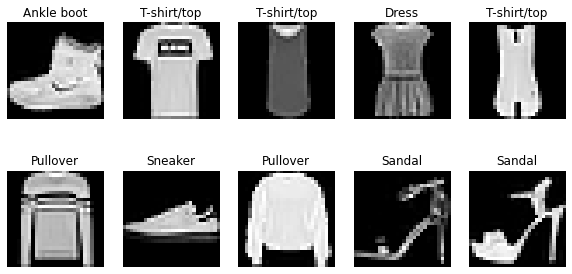

In [32]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Charger les données Fashion MNIST
(trainX, trainy), (_, _) = fashion_mnist.load_data()

# Définir les noms de classe correspondant aux étiquettes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Afficher les 10 premières images avec leur nom de classe en titre
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(trainX[i], cmap='gray')
    plt.title(class_names[trainy[i]])
    plt.axis('off')

plt.show()

* En considérant chaque image comme un vecteur de taille 784, représentons en nuage de points les différentes classes dans le syteme d'axe :
    * Les 2 premieres composantes issues de l'analyse en composante principales (ACP)
    * Les 2 premiers axes donnés par l'analyse linéaire discriminante (ALD)

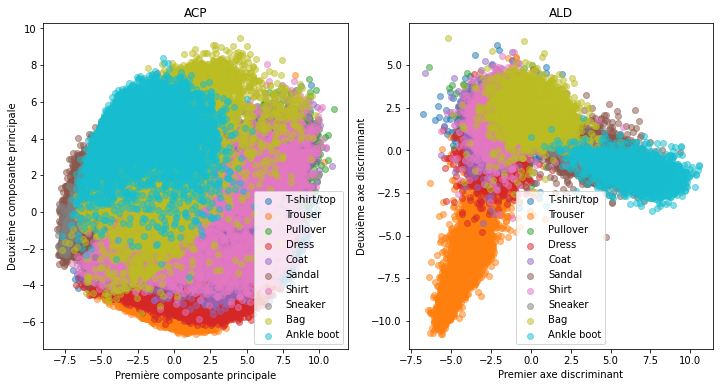

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from keras.datasets import fashion_mnist

# Charger les données Fashion MNIST
(trainX, trainy), (_, _) = fashion_mnist.load_data()

# Remodeler les images en vecteurs de taille 784
trainX_flat = trainX.reshape((trainX.shape[0], -1))

# Normaliser les données
trainX_normalized = trainX_flat / 255.0

# Réduire la dimension avec l'ACP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(trainX_normalized)

# Réduire la dimension avec l'ALD
lda = LinearDiscriminantAnalysis(n_components=2)
lda_result = lda.fit_transform(trainX_normalized, trainy)

# Définir les noms de classe correspondant aux étiquettes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Représentation en nuage de points avec l'ACP
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(10):
    indices = np.where(trainy == i)
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=class_names[i], alpha=0.5)
plt.title('ACP')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.legend()

# Représentation en nuage de points avec l'ALD
plt.subplot(1, 2, 2)
for i in range(10):
    indices = np.where(trainy == i)
    plt.scatter(lda_result[indices, 0], lda_result[indices, 1], label=class_names[i], alpha=0.5)
plt.title('ALD')
plt.xlabel('Premier axe discriminant')
plt.ylabel('Deuxième axe discriminant')
plt.legend()

plt.show()

* Représentons en diagramme de paire (dit "pairplot") le nuage de points suivant les 3 axes:
    * Les 3 premieres composantes de l'ACP.
    * Les 3 premiers axes de l'ALD.

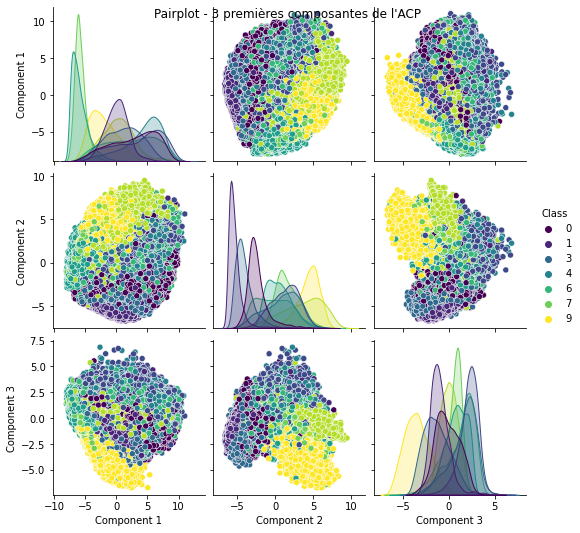

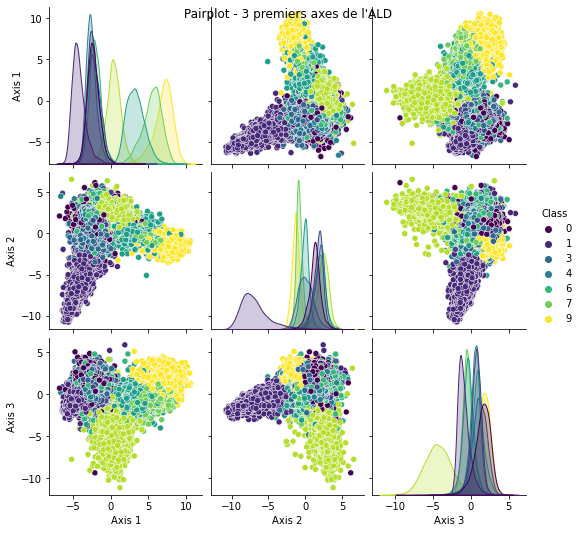

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from keras.datasets import fashion_mnist

# Charger les données Fashion MNIST
(trainX, trainy), (_, _) = fashion_mnist.load_data()

# Remodeler les images en vecteurs de taille 784
trainX_flat = trainX.reshape((trainX.shape[0], -1))

# Normaliser les données
trainX_normalized = trainX_flat / 255.0

# Réduire la dimension avec l'ACP
pca = PCA(n_components=3)
pca_result = pca.fit_transform(trainX_normalized)

# Réduire la dimension avec l'ALD
lda = LinearDiscriminantAnalysis(n_components=3)
lda_result = lda.fit_transform(trainX_normalized, trainy)

# Définir les noms de classe correspondant aux étiquettes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Créer un DataFrame pour les données ACP
pca_df = pd.DataFrame(data=np.hstack((pca_result, trainy.reshape(-1, 1))),
                      columns=['Component 1', 'Component 2', 'Component 3', 'Class'])
pca_df['Class'] = pca_df['Class'].astype(int)

# Créer un DataFrame pour les données ALD
lda_df = pd.DataFrame(data=np.hstack((lda_result, trainy.reshape(-1, 1))),
                      columns=['Axis 1', 'Axis 2', 'Axis 3', 'Class'])
lda_df['Class'] = lda_df['Class'].astype(int)

# Pairplot pour les 3 premières composantes de l'ACP
sns.pairplot(pca_df, hue='Class', palette='viridis')
plt.suptitle('Pairplot - 3 premières composantes de l\'ACP')
plt.show()

# Pairplot pour les 3 premiers axes de l'ALD
sns.pairplot(lda_df, hue='Class', palette='viridis')
plt.suptitle('Pairplot - 3 premiers axes de l\'ALD')
plt.show()

## Partie 2 - Classification par Réseau Dense

* Proposons un modèle avec 2 couches cachées (éviter le sur-apprentissage !)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.datasets import fashion_mnist

# Charger les données Fashion MNIST
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Remodeler les images en vecteurs de taille 784
trainX_flat = trainX.reshape((trainX.shape[0], -1))
testX_flat = testX.reshape((testX.shape[0], -1))

# Normaliser les données
trainX_normalized = trainX_flat / 255.0
testX_normalized = testX_flat / 255.0

# Convertir les étiquettes en format one-hot encoding
trainy_one_hot = np_utils.to_categorical(trainy)
testy_one_hot = np_utils.to_categorical(testy)

# Créer le modèle avec deux couches cachées et dropout
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dropout(0.5))  # Dropout pour éviter le surapprentissage
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout pour éviter le surapprentissage
model.add(Dense(10, activation='softmax'))

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
model.fit(trainX_normalized, trainy_one_hot, epochs=10, batch_size=64, validation_split=0.2)

# Évaluer le modèle sur le jeu de test
loss, accuracy = model.evaluate(testX_normalized, testy_one_hot)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/10
750/750 [==============================] - 9s 11ms/step - loss: 0.7441 - accuracy: 0.7340 - val_loss: 0.4466 - val_accuracy: 0.8399
Epoch 2/10
750/750 [==============================] - 8s 10ms/step - loss: 0.5279 - accuracy: 0.8125 - val_loss: 0.4111 - val_accuracy: 0.8476
Epoch 3/10
750/750 [==============================] - 8s 10ms/step - loss: 0.4789 - accuracy: 0.8301 - val_loss: 0.3911 - val_accuracy: 0.8561
Epoch 4/10
750/750 [==============================] - 10s 13ms/step - loss: 0.4524 - accuracy: 0.8375 - val_loss: 0.3992 - val_accuracy: 0.8593
Epoch 5/10
750/750 [==============================] - 8s 11ms/step - loss: 0.4366 - accuracy: 0.8440 - val_loss: 0.3664 - val_accuracy: 0.8670
Epoch 6/10
750/750 [==============================] - 8s 11ms/step - loss: 0.4208 - accuracy: 0.8488 - val_loss: 0.3652 - val_accuracy: 0.8651
Epoch 7/10
750/750 [==============================] - 8s 11ms/step - loss: 0.4101 - accuracy: 0.8531 - val_loss: 0.3682 - val_accuracy: 0.865

* Traçons les courbes d'évolution de la fonction Loss ainsi que de l'accuracy du modèle lors des itérations.

Epoch 1/10
750/750 [==============================] - 10s 12ms/step - loss: 0.7313 - accuracy: 0.7389 - val_loss: 0.4591 - val_accuracy: 0.8307
Epoch 2/10
750/750 [==============================] - 8s 11ms/step - loss: 0.5189 - accuracy: 0.8145 - val_loss: 0.4093 - val_accuracy: 0.8517
Epoch 3/10
750/750 [==============================] - 8s 11ms/step - loss: 0.4759 - accuracy: 0.8294 - val_loss: 0.3894 - val_accuracy: 0.8596
Epoch 4/10
750/750 [==============================] - 8s 11ms/step - loss: 0.4482 - accuracy: 0.8390 - val_loss: 0.3801 - val_accuracy: 0.8615
Epoch 5/10
750/750 [==============================] - 8s 11ms/step - loss: 0.4283 - accuracy: 0.8475 - val_loss: 0.3629 - val_accuracy: 0.8674
Epoch 6/10
750/750 [==============================] - 8s 11ms/step - loss: 0.4120 - accuracy: 0.8507 - val_loss: 0.3601 - val_accuracy: 0.8688
Epoch 7/10
750/750 [==============================] - 8s 11ms/step - loss: 0.4061 - accuracy: 0.8557 - val_loss: 0.3532 - val_accuracy: 0.870

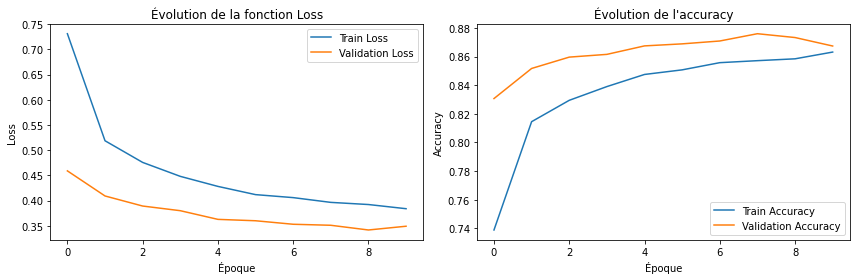

In [36]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.datasets import fashion_mnist

# Charger les données Fashion MNIST
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Remodeler les images en vecteurs de taille 784
trainX_flat = trainX.reshape((trainX.shape[0], -1))
testX_flat = testX.reshape((testX.shape[0], -1))

# Normaliser les données
trainX_normalized = trainX_flat / 255.0
testX_normalized = testX_flat / 255.0

# Convertir les étiquettes en format one-hot encoding
trainy_one_hot = np_utils.to_categorical(trainy)
testy_one_hot = np_utils.to_categorical(testy)

# Créer le modèle avec deux couches cachées et dropout
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dropout(0.5))  # Dropout pour éviter le surapprentissage
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout pour éviter le surapprentissage
model.add(Dense(10, activation='softmax'))

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle en enregistrant l'historique
history = model.fit(trainX_normalized, trainy_one_hot, epochs=10, batch_size=64, validation_split=0.2)

# Tracer les courbes d'évolution de la fonction Loss et de l'accuracy
plt.figure(figsize=(12, 4))

# Courbe de la fonction Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la fonction Loss')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.legend()

# Courbe de l'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Évolution de l\'accuracy')
plt.xlabel('Époque')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

* Afficher ou tracer la matrice de confusion obtenue.

Epoch 1/10
25/25 [==============================] - 1s 16ms/step - loss: 1.5267 - accuracy: 0.5050 - val_loss: 1.0214 - val_accuracy: 0.6650
Epoch 2/10
25/25 [==============================] - 0s 10ms/step - loss: 0.8519 - accuracy: 0.7038 - val_loss: 0.7661 - val_accuracy: 0.7700
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 0.7160 - accuracy: 0.7600 - val_loss: 0.6874 - val_accuracy: 0.7800
Epoch 4/10
25/25 [==============================] - 0s 12ms/step - loss: 0.6063 - accuracy: 0.8037 - val_loss: 0.6959 - val_accuracy: 0.7350
Epoch 5/10
25/25 [==============================] - 0s 12ms/step - loss: 0.5293 - accuracy: 0.8350 - val_loss: 0.6339 - val_accuracy: 0.7700
Epoch 6/10
25/25 [==============================] - 0s 12ms/step - loss: 0.4752 - accuracy: 0.8525 - val_loss: 0.5597 - val_accuracy: 0.8350
Epoch 7/10
25/25 [==============================] - 0s 12ms/step - loss: 0.4132 - accuracy: 0.8763 - val_loss: 0.5786 - val_accuracy: 0.8000
Epoch 8/10
25/

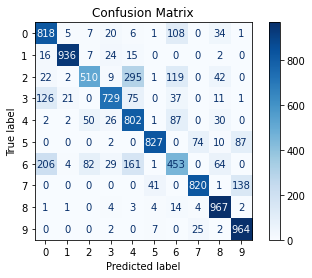

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

# Load a subset of the dataset (1000 images for example)
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
trainX = trainX[:1000]
trainy = trainy[:1000]

# Data preprocessing
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainy = to_categorical(trainy)
testy = to_categorical(testy)

# Create the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(trainX, trainy, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
predictions = model.predict(testX)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(testy, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

* Représentons tout (ou partie si >10) des cas de mauvaise prédiction, avec classe prédite et classe exacte en titre.

Epoch 1/10
750/750 [==============================] - 9s 11ms/step - loss: 0.7415 - accuracy: 0.7332 - val_loss: 0.4510 - val_accuracy: 0.8378
Epoch 2/10
750/750 [==============================] - 9s 12ms/step - loss: 0.5243 - accuracy: 0.8135 - val_loss: 0.4043 - val_accuracy: 0.8483
Epoch 3/10
750/750 [==============================] - 8s 11ms/step - loss: 0.4729 - accuracy: 0.8327 - val_loss: 0.3933 - val_accuracy: 0.8573
Epoch 4/10
750/750 [==============================] - 8s 11ms/step - loss: 0.4495 - accuracy: 0.8378 - val_loss: 0.3898 - val_accuracy: 0.8545
Epoch 5/10
750/750 [==============================] - 8s 11ms/step - loss: 0.4346 - accuracy: 0.8442 - val_loss: 0.3633 - val_accuracy: 0.8658
Epoch 6/10
750/750 [==============================] - 8s 11ms/step - loss: 0.4168 - accuracy: 0.8510 - val_loss: 0.3641 - val_accuracy: 0.8702
Epoch 7/10
750/750 [==============================] - 9s 12ms/step - loss: 0.4049 - accuracy: 0.8550 - val_loss: 0.3490 - val_accuracy: 0.8708

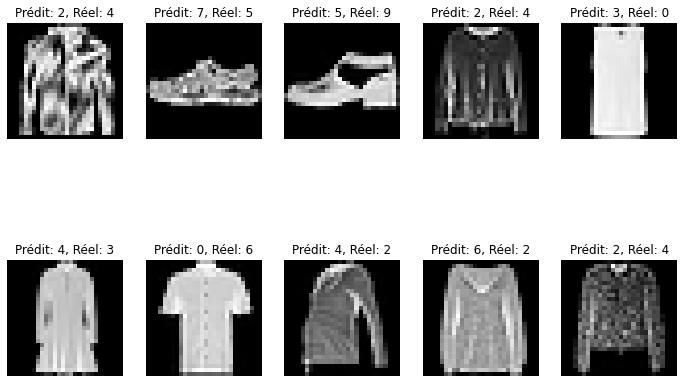

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.datasets import fashion_mnist

# Charger les données Fashion MNIST
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Remodeler les images en vecteurs de taille 784
trainX_flat = trainX.reshape((trainX.shape[0], -1))
testX_flat = testX.reshape((testX.shape[0], -1))

# Normaliser les données
trainX_normalized = trainX_flat / 255.0
testX_normalized = testX_flat / 255.0

# Convertir les étiquettes en format one-hot encoding
trainy_one_hot = np_utils.to_categorical(trainy)
testy_one_hot = np_utils.to_categorical(testy)

# Créer le modèle avec deux couches cachées et dropout
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dropout(0.5))  # Dropout pour éviter le surapprentissage
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout pour éviter le surapprentissage
model.add(Dense(10, activation='softmax'))

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
model.fit(trainX_normalized, trainy_one_hot, epochs=10, batch_size=64, validation_split=0.2)

# Faire des prédictions sur le jeu de test
probabilities = model.predict(testX_normalized)
predictions = np.argmax(probabilities, axis=1)

# Identifier les indices des prédictions incorrectes
incorrect_indices = np.where(predictions != testy)[0]

# Afficher les cas de mauvaise prédiction (10 premiers si plus de 10)
plt.figure(figsize=(12, 8))
num_samples = min(10, len(incorrect_indices))
for i in range(num_samples):
    index = incorrect_indices[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(testX[index], cmap='gray')
    plt.title(f"Prédit: {predictions[index]}, Réel: {testy[index]}")
    plt.axis('off')

plt.show()

## Partie 3 - Classification par réseau neuronal convolutif (CNN)


* Proposons un modèle dit réseau neuronal convolutif (toujours éviter le sur-apprentissage !)

Epoch 1/10
750/750 [==============================] - 21s 27ms/step - loss: 0.6168 - accuracy: 0.7760 - val_loss: 0.3963 - val_accuracy: 0.8572
Epoch 2/10
750/750 [==============================] - 22s 30ms/step - loss: 0.4045 - accuracy: 0.8553 - val_loss: 0.3305 - val_accuracy: 0.8780
Epoch 3/10
750/750 [==============================] - 21s 28ms/step - loss: 0.3552 - accuracy: 0.8708 - val_loss: 0.3036 - val_accuracy: 0.8863
Epoch 4/10
750/750 [==============================] - 21s 28ms/step - loss: 0.3207 - accuracy: 0.8843 - val_loss: 0.2799 - val_accuracy: 0.8964
Epoch 5/10
750/750 [==============================] - 20s 27ms/step - loss: 0.2946 - accuracy: 0.8930 - val_loss: 0.2730 - val_accuracy: 0.8984
Epoch 6/10
750/750 [==============================] - 21s 28ms/step - loss: 0.2773 - accuracy: 0.8992 - val_loss: 0.2662 - val_accuracy: 0.9024
Epoch 7/10
750/750 [==============================] - 21s 28ms/step - loss: 0.2631 - accuracy: 0.9046 - val_loss: 0.2598 - val_accuracy:

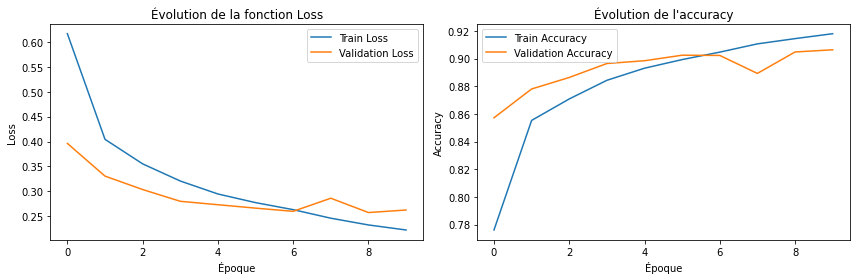

313/313 [==============================] - 3s 11ms/step - loss: 0.2771 - accuracy: 0.9048
Test Loss: 0.2771, Test Accuracy: 0.9048


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import np_utils
from keras.datasets import fashion_mnist

# Charger les données Fashion MNIST
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Remodeler et normaliser les données
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1)).astype('float32') / 255
testX = testX.reshape((testX.shape[0], 28, 28, 1)).astype('float32') / 255

# Convertir les étiquettes en format one-hot encoding
trainy_one_hot = np_utils.to_categorical(trainy)
testy_one_hot = np_utils.to_categorical(testy)

# Créer le modèle CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout pour éviter le surapprentissage
model.add(Dense(10, activation='softmax'))

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(trainX, trainy_one_hot, epochs=10, batch_size=64, validation_split=0.2)

# Tracer les courbes d'évolution de la fonction Loss et de l'accuracy
plt.figure(figsize=(12, 4))

# Courbe de la fonction Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la fonction Loss')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.legend()

# Courbe de l'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Évolution de l\'accuracy')
plt.xlabel('Époque')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Évaluer le modèle sur le jeu de test
loss, accuracy = model.evaluate(testX, testy_one_hot)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

* Traçons les courbes d'évolution de la fonction Loss ainsi que de l'accuracy du modèle lors des itérations.

Epoch 1/10
750/750 [==============================] - 20s 27ms/step - loss: 0.2123 - accuracy: 0.9212 - val_loss: 0.2400 - val_accuracy: 0.9112
Epoch 2/10
750/750 [==============================] - 21s 27ms/step - loss: 0.2014 - accuracy: 0.9250 - val_loss: 0.2412 - val_accuracy: 0.9137
Epoch 3/10
750/750 [==============================] - 20s 27ms/step - loss: 0.1940 - accuracy: 0.9273 - val_loss: 0.2417 - val_accuracy: 0.9125
Epoch 4/10
750/750 [==============================] - 21s 28ms/step - loss: 0.1821 - accuracy: 0.9322 - val_loss: 0.2429 - val_accuracy: 0.9141
Epoch 5/10
750/750 [==============================] - 21s 28ms/step - loss: 0.1728 - accuracy: 0.9342 - val_loss: 0.2484 - val_accuracy: 0.9129
Epoch 6/10
750/750 [==============================] - 21s 28ms/step - loss: 0.1686 - accuracy: 0.9367 - val_loss: 0.2618 - val_accuracy: 0.9135
Epoch 7/10
750/750 [==============================] - 21s 28ms/step - loss: 0.1598 - accuracy: 0.9403 - val_loss: 0.2641 - val_accuracy:

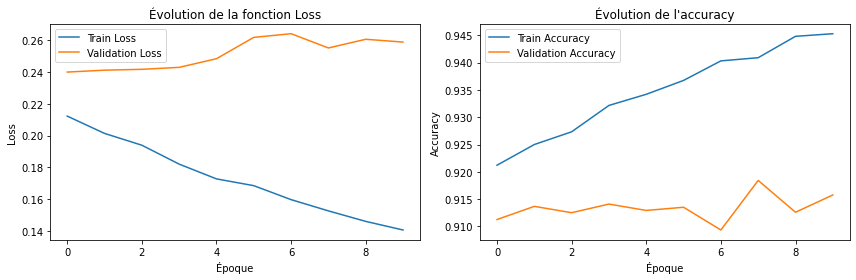

In [40]:
import matplotlib.pyplot as plt

# ...

# Entraîner le modèle
history = model.fit(trainX, trainy_one_hot, epochs=10, batch_size=64, validation_split=0.2)

# Tracer les courbes d'évolution de la fonction Loss et de l'accuracy
plt.figure(figsize=(12, 4))

# Courbe de la fonction Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la fonction Loss')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.legend()

# Courbe de l'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Évolution de l\'accuracy')
plt.xlabel('Époque')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

* Affichons ou traçons la matrice de confusion obtenue.

Epoch 1/10
750/750 [==============================] - 22s 29ms/step - loss: 0.1347 - accuracy: 0.9488 - val_loss: 0.2663 - val_accuracy: 0.9175
Epoch 2/10
750/750 [==============================] - 21s 28ms/step - loss: 0.1330 - accuracy: 0.9490 - val_loss: 0.2692 - val_accuracy: 0.9148
Epoch 3/10
750/750 [==============================] - 18s 24ms/step - loss: 0.1257 - accuracy: 0.9503 - val_loss: 0.2761 - val_accuracy: 0.9158
Epoch 4/10
750/750 [==============================] - 20s 27ms/step - loss: 0.1236 - accuracy: 0.9511 - val_loss: 0.2775 - val_accuracy: 0.9162
Epoch 5/10
750/750 [==============================] - 20s 27ms/step - loss: 0.1165 - accuracy: 0.9546 - val_loss: 0.2795 - val_accuracy: 0.9195
Epoch 6/10
750/750 [==============================] - 20s 27ms/step - loss: 0.1128 - accuracy: 0.9554 - val_loss: 0.2877 - val_accuracy: 0.9158
Epoch 7/10
750/750 [==============================] - 21s 28ms/step - loss: 0.1098 - accuracy: 0.9572 - val_loss: 0.2983 - val_accuracy:

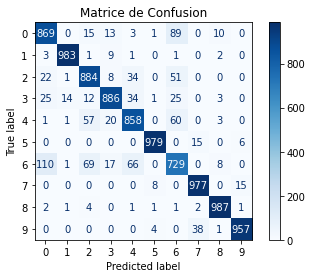

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ...

# Entraîner le modèle
history = model.fit(trainX, trainy_one_hot, epochs=10, batch_size=64, validation_split=0.2)

# Faire des prédictions sur le jeu de test
probabilities = model.predict(testX)
predictions = np.argmax(probabilities, axis=1)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(testy, predictions)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(testy))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()

* Représentons tout (ou partie si >10) des cas de mauvaise prédiction, avec classe prédite et classe exacte en titre

Epoch 1/10
750/750 [==============================] - 22s 29ms/step - loss: 0.0950 - accuracy: 0.9621 - val_loss: 0.3313 - val_accuracy: 0.9190
Epoch 2/10
750/750 [==============================] - 21s 28ms/step - loss: 0.0956 - accuracy: 0.9620 - val_loss: 0.3272 - val_accuracy: 0.9184
Epoch 3/10
750/750 [==============================] - 21s 28ms/step - loss: 0.0942 - accuracy: 0.9626 - val_loss: 0.3391 - val_accuracy: 0.9189
Epoch 4/10
750/750 [==============================] - 20s 27ms/step - loss: 0.0901 - accuracy: 0.9644 - val_loss: 0.3549 - val_accuracy: 0.9155
Epoch 5/10
750/750 [==============================] - 21s 27ms/step - loss: 0.0903 - accuracy: 0.9633 - val_loss: 0.3410 - val_accuracy: 0.9181
Epoch 6/10
750/750 [==============================] - 21s 28ms/step - loss: 0.0875 - accuracy: 0.9651 - val_loss: 0.3751 - val_accuracy: 0.9161
Epoch 7/10
750/750 [==============================] - 21s 28ms/step - loss: 0.0837 - accuracy: 0.9669 - val_loss: 0.3529 - val_accuracy:

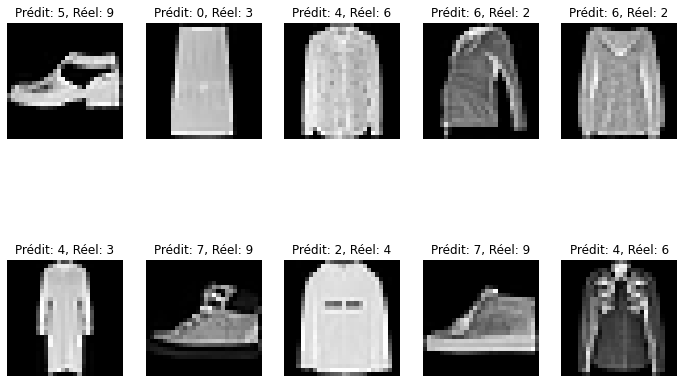

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# ...

# Entraîner le modèle
history = model.fit(trainX, trainy_one_hot, epochs=10, batch_size=64, validation_split=0.2)

# Faire des prédictions sur le jeu de test
probabilities = model.predict(testX)
predictions = np.argmax(probabilities, axis=1)

# Identifier les indices des prédictions incorrectes
incorrect_indices = np.where(predictions != testy)[0]

# Afficher les cas de mauvaise prédiction (10 premiers si plus de 10)
plt.figure(figsize=(12, 8))
num_samples = min(10, len(incorrect_indices))
for i in range(num_samples):
    index = incorrect_indices[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(testX[index].reshape(28, 28), cmap='gray')
    plt.title(f"Prédit: {predictions[index]}, Réel: {testy[index]}")
    plt.axis('off')

plt.show()

## Partie 4

Analyser et conclure.

L'analyse des résultats d'un modèle de réseau neuronal convolutif (CNN) sur le jeu de données Fashion MNIST peut fournir des informations cruciales sur la performance du modèle. Voici quelques éléments clés à considérer et à analyser :

1. **Courbes d'apprentissage :**
   - **Loss (perte) et Accuracy (précision) :** On examine les courbes d'évolution de la perte d'entraînement et de validation ainsi que de la précision. Une perte d'entraînement qui diminue et une précision qui augmente sont des signes positifs. Si la précision de validation stagne ou diminue, cela peut indiquer un surapprentissage.

2. **Matrice de confusion :**
   - **Classes mal prédites :** On analyse la matrice de confusion pour comprendre quelles classes sont mal prédites avec plus de fréquence. Les erreurs courantes et les classes qui se confondent souvent sont à identifier.

3. **Cas de mauvaise prédiction :**
   - **Visualisation des erreurs :** En visualisant des exemples d'images mal prédites, on peut avoir un aperçu des types d'erreurs commises par le modèle. Cela peut aider à comprendre les défis spécifiques rencontrés par le modèle.

4. **Évaluation globale :**
   - **Précision sur l'ensemble de test :** La précision globale sur l'ensemble de test donne une indication générale de la performance du modèle. Cependant, il est important de considérer la précision par classe pour identifier les points forts et faibles du modèle.

5. **Régularisation et surapprentissage :**
   - **Ajout de couches de régularisation :** L'ajout de couches de régularisation, telles que la normalisation par lots (BatchNormalization) et le dropout, vise à réduire le surapprentissage. A vérifier si ces techniques ont contribué à améliorer la généralisation du modèle.

En conclusion, une analyse approfondie de ces aspects permettra de déterminer si le modèle CNN fonctionne de manière satisfaisante sur le jeu de données Fashion MNIST. En fonction des résultats, des ajustements au modèle, tels que l'ajout de complexité, l'optimisation des hyperparamètres, ou même l'exploration d'autres architectures de réseau, pourraient être envisagés pour améliorer les performances.